## Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
# Import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [2]:
!unzip 'cones_kps_dataset.zip'

Archive:  cones_kps_dataset.zip
   creating: cones_kps_dataset/images/
  inflating: cones_kps_dataset/images/vid_124_frame_2357_1.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_2357_2.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_2580_3.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_2979_0.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_3366_1.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_3689_0.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_4306_1.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_4384_3.jpg  
  inflating: cones_kps_dataset/images/vid_124_frame_4413_1.jpg  
  inflating: cones_kps_dataset/images/vid_125_frame_2740_1.jpg  
  inflating: cones_kps_dataset/images/vid_125_frame_302_0.jpg  
  inflating: cones_kps_dataset/images/vid_125_frame_3117_2.jpg  
  inflating: cones_kps_dataset/images/vid_125_frame_44_0.jpg  
  inflating: cones_kps_dataset/images/vid_125_frame_449_0.jpg  
  inflating: cones_kps_

In [3]:
df = pd.read_json("/content/cones_kps_dataset/keypoints.json")

In [4]:
df.shape

(7, 3197)

In [5]:
df.head()

,vid_37_frame_400_3.jpg,vid_37_frame_346_0.jpg,vid_37_frame_208_3.jpg,vid_36_frame_54_5.jpg,vid_37_frame_204_4.jpg,vid_37_frame_425_6.jpg,vid_37_frame_245_6.jpg,vid_37_frame_357_7.jpg,vid_37_frame_245_3.jpg,vid_37_frame_255_8.jpg,...,vid_38_frame_758_16.jpg,vid_62_frame_52_3.jpg,vid_56_frame_178_1.jpg,vid_64_frame_74_0.jpg,vid_42_frame_777_7.jpg,vid_38_frame_575_6.jpg,vid_42_frame_439_2.jpg,vid_38_frame_937_1.jpg,vid_62_frame_74_2.jpg,vid_53_frame_134_3.jpg
0,"[37, 1]","[41, 5]","[47, 1]","[44, 0]","[29, 0]","[44, 6]","[44, 5]","[26, 0]","[29, 2]","[50, 2]",...,"[51, 2]","[36, 1]","[37, 2]","[36, 3]","[33, 6]","[41, 4]","[32, 3]","[37, 1]","[46, 5]","[35, 3]"
1,"[18, 26]","[25, 26]","[26, 27]","[28, 24]","[14, 25]","[29, 26]","[27, 27]","[14, 20]","[21, 25]","[29, 26]",...,"[36, 22]","[25, 24]","[25, 26]","[25, 28]","[24, 26]","[25, 25]","[19, 25]","[24, 23]","[32, 30]","[25, 30]"
2,"[50, 28]","[56, 26]","[59, 25]","[60, 24]","[41, 25]","[53, 26]","[57, 27]","[41, 19]","[43, 23]","[64, 26]",...,"[58, 24]","[49, 24]","[49, 26]","[47, 28]","[49, 26]","[51, 25]","[45, 25]","[50, 22]","[56, 31]","[47, 28]"
3,"[13, 41]","[21, 45]","[23, 42]","[24, 43]","[9, 46]","[23, 45]","[22, 43]","[12, 41]","[18, 42]","[21, 44]",...,"[28, 40]","[19, 46]","[22, 42]","[23, 45]","[18, 45]","[25, 42]","[17, 49]","[18, 43]","[27, 48]","[22, 43]"
4,"[50, 43]","[60, 45]","[62, 42]","[60, 43]","[46, 46]","[59, 47]","[63, 43]","[48, 40]","[50, 40]","[66, 44]",...,"[60, 41]","[54, 45]","[51, 42]","[49, 45]","[58, 43]","[57, 42]","[49, 47]","[55, 41]","[60, 51]","[52, 42]"


## Transposing Dataframe & Loading images

In [6]:
# change header file to a column
df =df.transpose()

In [7]:
df.head()

,0,1,2,3,4,5,6
vid_37_frame_400_3.jpg,"[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
vid_37_frame_346_0.jpg,"[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
vid_37_frame_208_3.jpg,"[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
vid_36_frame_54_5.jpg,"[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
vid_37_frame_204_4.jpg,"[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,index,0,1,2,3,4,5,6
0,vid_37_frame_400_3.jpg,"[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
1,vid_37_frame_346_0.jpg,"[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
2,vid_37_frame_208_3.jpg,"[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
3,vid_36_frame_54_5.jpg,"[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
4,vid_37_frame_204_4.jpg,"[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


In [10]:
df.columns = ['image_id', 'Point_1',"Point_2","Point_3","Point_4","Point_5","Point_6", "Point 7"]
df.head()

,image_id,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point 7
0,vid_37_frame_400_3.jpg,"[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
1,vid_37_frame_346_0.jpg,"[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
2,vid_37_frame_208_3.jpg,"[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
3,vid_36_frame_54_5.jpg,"[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
4,vid_37_frame_204_4.jpg,"[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


In [11]:
df['All_Points'] = df[['Point_1', 'Point_2', 'Point_3', 'Point_4', 'Point_5', 'Point_6', 'Point 7']].values.tolist()

In [12]:
df['All_Points'].head()

0    [[37, 1], [18, 26], [50, 28], [13, 41], [50, 4...
1    [[41, 5], [25, 26], [56, 26], [21, 45], [60, 4...
2    [[47, 1], [26, 27], [59, 25], [23, 42], [62, 4...
3    [[44, 0], [28, 24], [60, 24], [24, 43], [60, 4...
4    [[29, 0], [14, 25], [41, 25], [9, 46], [46, 46...
Name: All_Points, dtype: object

In [13]:
df.drop(columns=['Point_1', 'Point_2', 'Point_3', 'Point_4', 'Point_5', 'Point_6', 'Point 7'],inplace = True)

In [14]:
df.head()

,image_id,All_Points
0,vid_37_frame_400_3.jpg,"[[37, 1], [18, 26], [50, 28], [13, 41], [50, 4..."
1,vid_37_frame_346_0.jpg,"[[41, 5], [25, 26], [56, 26], [21, 45], [60, 4..."
2,vid_37_frame_208_3.jpg,"[[47, 1], [26, 27], [59, 25], [23, 42], [62, 4..."
3,vid_36_frame_54_5.jpg,"[[44, 0], [28, 24], [60, 24], [24, 43], [60, 4..."
4,vid_37_frame_204_4.jpg,"[[29, 0], [14, 25], [41, 25], [9, 46], [46, 46..."


In [15]:
df['image_id'] = '/content/cones_kps_dataset/images/' + df['image_id']
df['image_id'].head()

0    /content/cones_kps_dataset/images/vid_37_frame...
1    /content/cones_kps_dataset/images/vid_37_frame...
2    /content/cones_kps_dataset/images/vid_37_frame...
3    /content/cones_kps_dataset/images/vid_36_frame...
4    /content/cones_kps_dataset/images/vid_37_frame...
Name: image_id, dtype: object

In [16]:
import PIL.Image
import matplotlib.pyplot as plt
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image =  PIL.Image.open(img_path)
        keypoints = torch.tensor((self.dataframe.iloc[idx, 1]))
        if self.transform:
            image = self.transform(image)
        return image, keypoints


In [17]:
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(80, scale=(0.8, 1.5)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.2,random_state= 42)

In [19]:
train_data, val_data = train_test_split(train_data,test_size=0.2,random_state= 42)

In [20]:
batch_size = 64

train_dataset = CustomDataset(train_data, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle = True)

val_dataset = CustomDataset(val_data, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

test_dataset = CustomDataset(test_data,transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

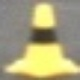

In [21]:
from IPython.display import Image
Image(filename='/content/cones_kps_dataset/images/vid_124_frame_2357_1.jpg')

Batch shape: torch.Size([64, 3, 80, 80])
batch kps:  torch.Size([64, 7, 2])


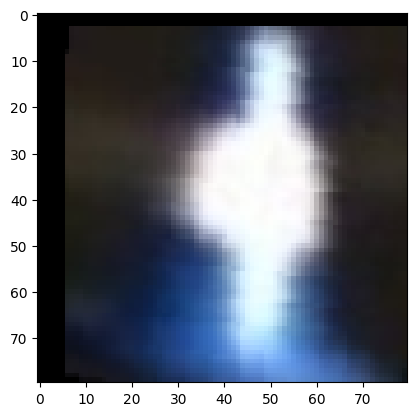

In [22]:
import matplotlib.pyplot as plt

for batch_images, batch_kps in train_loader:
    print("Batch shape:", batch_images.shape)
    print('batch kps: ',batch_kps.shape)

    plt.imshow(batch_images[2].permute(1, 2, 0))  # Assuming the images are in CHW format
    plt.show()

    break


## Plotting Data

In [23]:
# plt.figure(figsize =(10,10))                      #Displaying the test dataset
# for n in range(25):
#     ax = plt.subplot(5,5,n+1)
#     points = y_train[n].reshape(7,2)
#     plt.plot(points[:,0],points[:,1],'ro')
#     plt.imshow(X_train[n])
#     #plt.axis('off')
# print(points)

In [24]:
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 80*80*3

        self.conv1 = nn.Conv2d(3, 64, 7, padding='valid')

        self.conv2 = nn.Conv2d(64, 64, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(64)
        self.conv3= nn.Conv2d( 64, 64, 3,padding = 'same')
        self.bn2 = nn.BatchNorm2d(64)


        self.conv4= nn.Conv2d(64,128,3,padding =  'same')
        self.bn3 = nn.BatchNorm2d(128)
        self.conv5= nn.Conv2d(128,128,3,padding = 'same')
        self.bn4 = nn.BatchNorm2d(128)



        self.conv6= nn.Conv2d(128,256,3,padding =  'same')
        self.bn5 = nn.BatchNorm2d(256)
        self.conv7= nn.Conv2d(256,256,3,padding = 'same')
        self.bn6 = nn.BatchNorm2d(256)



        # self.conv8= nn.Conv2d(256,512,3,padding =  'same')
        # self.bn7 = nn.BatchNorm2d(512)
        # self.conv9= nn.Conv2d(512,512,3,padding ='same')  # 512, 74, 74
        # self.bn8 = nn.BatchNorm2d(512)

        self.resconv1 = nn.Conv2d(64,64,1,padding =  'same')
        self.resconv2= nn.Conv2d(64,128,1,padding =  'same')
        self.resconv3= nn.Conv2d(128,256,1,padding =  'same')
        self.resconv4= nn.Conv2d(256,512,1,padding =  'same')
        ######################

        # self.fc1 = nn.Linear(512 * 74 * 74, 500)
        self.fc1 = nn.Linear(256 * 74 * 74, 500)


        self.fc2 = nn.Linear(500, 14)

        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x1 = (self.conv1(x))

        x_clone = self.resconv1(x1)
        x1 = (self.conv2(x1))
        x1 = (F.relu(self.bn1(x1)))
        x1 = self.conv3(x1)
        x1 = (F.relu(self.bn2(x1)))

        x2 = (self.conv4(x_clone + x1))
        x_clone = self.resconv2(x_clone + x1)
        x2 = (F.relu(self.bn3(x2)))
        x2 = self.conv5(x2)
        x2 = (F.relu(self.bn4(x2)))

        x3 = (self.conv6(x_clone + x2))
        x_clone = self.resconv3(x_clone + x2)
        x3 = (F.relu(self.bn5(x3)))
        x3 = self.conv7(x3)
        x3 = (F.relu(self.bn6(x3)))

        # x4 = (self.conv8(x_clone + x3))
        # x_clone = self.resconv4(x_clone + x3)
        # x4 = (F.relu(self.bn7(x4)))
        # x4 = self.conv9(x4)
        # x4 = (F.relu(self.bn8(x4)))
        x = x3 + x_clone
        # print(x.shape)

        # x = x.view(-1, 512 * 74 * 74)
        x = x.view(-1, 256 * 74 * 74)

        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [25]:
model= Net()
model.to('cuda')

Net(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=valid)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn6): BatchN

In [26]:
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
n_epochs = 700

valid_loss_min = np.Inf

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in train_loader:
        data= data.to('cuda')

        optimizer.zero_grad()

        data = data.to('cuda')
        target = target.float().to('cuda')
        output = model(data)
        loss = criterion(output, target.view((-1, 14)))

        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    model.eval()
    for data, target in val_loader:
        target = target.to('cuda')
        data= data.to('cuda')
        output = model(data)
        loss = criterion(output, target.view(-1,14))
        valid_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(val_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 957009.963334 	Validation Loss: 2352.612549
Validation loss decreased (inf --> 2352.612549).  Saving model ...
Epoch: 2 	Training Loss: 2253.782075 	Validation Loss: 2148.905548
Validation loss decreased (2352.612549 --> 2148.905548).  Saving model ...
Epoch: 3 	Training Loss: 2058.812020 	Validation Loss: 1963.007629
Validation loss decreased (2148.905548 --> 1963.007629).  Saving model ...
Epoch: 4 	Training Loss: 1880.888090 	Validation Loss: 1793.364365
Validation loss decreased (1963.007629 --> 1793.364365).  Saving model ...
Epoch: 5 	Training Loss: 1718.525619 	Validation Loss: 1638.564087
Validation loss decreased (1793.364365 --> 1638.564087).  Saving model ...
Epoch: 6 	Training Loss: 1570.362749 	Validation Loss: 1497.294662
Validation loss decreased (1638.564087 --> 1497.294662).  Saving model ...
Epoch: 7 	Training Loss: 1435.152835 	Validation Loss: 1368.381104
Validation loss decreased (1497.294662 --> 1368.381104).  Saving model ...
Epoch: 8 	Tr